In [ ]:
!pip install langchain langchain-google-genai langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 721.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.43.0
    Uninstalling google-auth-2.43.0:


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
import time
from google import genai
from langchain.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:

client = genai.Client()
llm = ChatGoogleGenerativeAI(model="gemini-3-pro-preview")import os
from google.colab import userdata

In [ ]:
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

## SIMPLE CHATTING

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-3-pro-preview",
    temperature=1.0,  # Gemini 3.0+ defaults to 1.0
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [ ]:
response = llm.invoke("Hello My name is Aryan , kaise ho aap ? ")


In [ ]:
response.content[0]["text"]

'Hello Aryan! Main bilkul theek hoon. Aap kaise hain?\n\nBataiye aaj main aapki kaise madad kar sakta hoon?'

##DOCUMENT PASSING INTEGRATION

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:

client = genai.Client()
llm = ChatGoogleGenerativeAI(model="gemini-3-pro-preview")

In [ ]:
myfile = client.files.upload(file="/content/Aryan_November_CV.pdf")

In [ ]:
myfile.uri

'https://generativelanguage.googleapis.com/v1beta/files/kx9cz8bbhhq4'

In [ ]:
while myfile.state.name == "PROCESSING":
    time.sleep(2)
    myfile = client.files.get(name=myfile.name)

In [ ]:
# Reference by file_id in FileContentBlock
message = HumanMessage(
    content=[
        {"type": "text", "text": "Summarize the document ?"},
        {
            "type": "file",
            "file_id": myfile.uri,  # or myfile.name
            "mime_type": "application/pdf",
        },
    ]
)

In [ ]:
response = llm.invoke([message])


In [ ]:
response.content[0]["text"]

'Here is a summary of the resume for **Aryan**, an AI Engineer and Data Scientist based in India.\n\n**Professional Overview**\nAryan is an AI Engineer with over **2 years of experience**, currently working as a Senior AI Engineer. He holds an M.Tech in Artificial Intelligence from NIT Agartala. His expertise lies in **Generative AI, Deep Learning (NLP & Image Processing), and Machine Learning**.\n\n**Work Experience**\n*   **Senior AI Engineer at Variphi (Sep 2024 – Present):**\n    *   Built an **AI-powered surveillance platform** utilizing Computer Vision (YOLO/ResNet50) and NLP (GPT-4o) for real-time tracking and video analysis.\n    *   Developed a **RAG-based system** capable of parsing 20,000+ PDFs using VectorDB and Gemini AI.\n    *   Fine-tuned the **Qwen2.5-VL-7B** model and leveraged **NVIDIA TAO Toolkit** for 3D pose estimation with low latency (<50ms).\n    *   Engineered a synthetic data pipeline using **NVIDIA Omniverse** and Blender to reduce labeling costs by 40%.\n  

##IMAGE INTEGRATION

1.   List item
2.   List item



In [ ]:
import base64
from langchain.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI


In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-3-pro-preview")

In [ ]:
# 1. Helper function to encode a local image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


In [ ]:
# 2. Encode your physical file
local_image_path = "/content/TEST_Image.png"
base64_image = encode_image(local_image_path)

In [ ]:
# 3. Create the message with both a URL and the local file
message = HumanMessage(
    content=[
        {"type": "text", "text": "What is Happening in the image ?"},
        # Image via physical file (Base64)
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        },
    ]
)

In [ ]:
response = llm.invoke([message])

In [ ]:
response.content[0]["text"]

'Based on the CCTV footage image, here is a breakdown of what is happening:\n\n**Setting & Time:**\n*   **Source:** It is a surveillance camera still labeled "Camera 01".\n*   **Time:** The timestamp indicates it is **Friday, February 28, 2025, at approximately 5:59 PM**.\n*   **Location:** The scene appears to be the entrance of a commercial establishment (likely a hotel, restaurant, or residential complex) adjacent to a public street.\n\n**Key Actions & People:**\n1.  **Security Guard:** In the foreground on the right, a security guard in a dark uniform with shoulder patches and a yellow lanyard is walking or turning near a wooden podium. He appears to be on duty, monitoring the entrance area.\n2.  **Foreground Pedestrian:** On the bottom left, a man wearing a dark blue t-shirt and beige pants is walking past the establishment on the sidewalk.\n3.  **People on the Street:**\n    *   **Walking Group:** In the middle ground on the street, a group of three men is walking from right to l

##VIDEO CAPTIONING

In [ ]:
import base64
from langchain.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-3-pro-preview")

video_bytes = open("/content/new_video.mp4", "rb").read()
video_base64 = base64.b64encode(video_bytes).decode("utf-8")
mime_type = "video/mp4"


In [ ]:
message = HumanMessage(
    content=[
        {"type": "text", "text": "Describe what's in this video in a sentence."},
        {
            "type": "video",
            "base64": video_base64,
            "mime_type": mime_type,
        },
    ]
)

In [ ]:
response = llm.invoke([message])

In [ ]:
response.content[0]["text"]

'A uniformed security guard opens the glass door for a visitor, checks a logbook on a wooden podium, and then paces around the entrance area to keep watch while traffic passes by on the street.'

##IMAGE GENERATION

1.   List item
2.   List item



In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI, Modality

model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-image",
    response_modalities=[Modality.IMAGE],
)

# All invocations will return only images
response = model.invoke("Generate a photorealistic image of a cuddly cat wearing a hat.")

In [1]:
response.content[0]["image_url"]

NameError: name 'response' is not defined

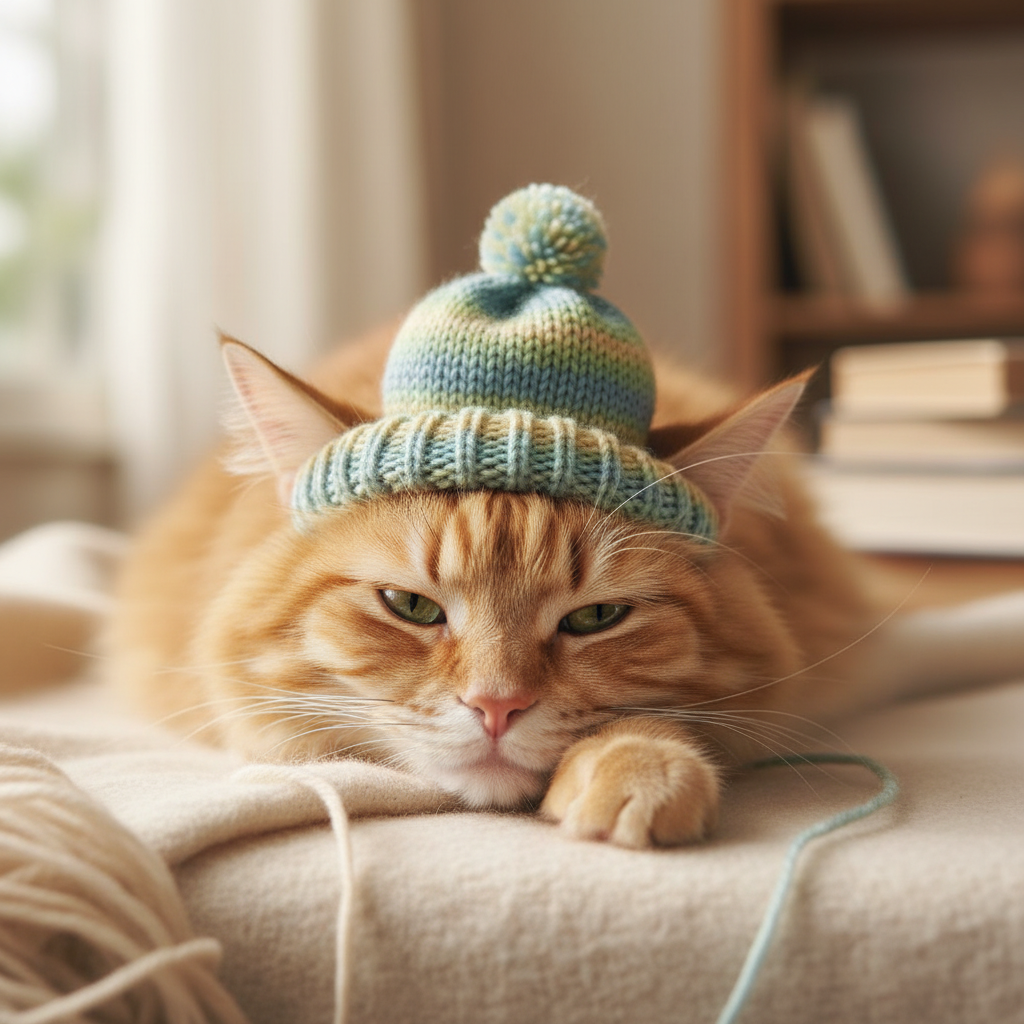

In [ ]:
import base64
from IPython.display import Image, display

# Extract the base64 string from the image_url
image_data_url = response.content[0]["image_url"]['url']

# The base64 string starts after 'data:image/png;base64,'
base64_string = image_data_url.split(',')[1]

# Decode the base64 string
decoded_image = base64.b64decode(base64_string)

# Display the image
display(Image(data=decoded_image))

In [ ]:
import sys
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
